# ISLP - Chapter 3 - Exercise 15
### Author: pzuehlke

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

__15 (a):__ We first prepare the data by renaming the `Unnamed: 0` column
and setting it as the index column, exactly as in exercise 10 of chapter 2:

In [61]:
housing = pd.read_csv("Boston.csv") 
housing.columns
housing.dropna()
housing = housing.rename({"Unnamed: 0": "property"}, axis=1)
housing.set_index("property", inplace=True)

Now let's build all of the models at once and store them in a dictionary:

In [62]:
y = housing["crim"]
models = dict()
predictors = [col for col in housing.columns if col != "crim"]
for predictor in predictors:
    x = housing[predictor]
    X = sm.add_constant(x)
    models[predictor] = sm.OLS(y, X).fit()

Now let's consider the scatterplots of the crime rate against each of the predictors:

In [64]:
p = len(predictors)
print(predictors)
print(p)

['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']
12


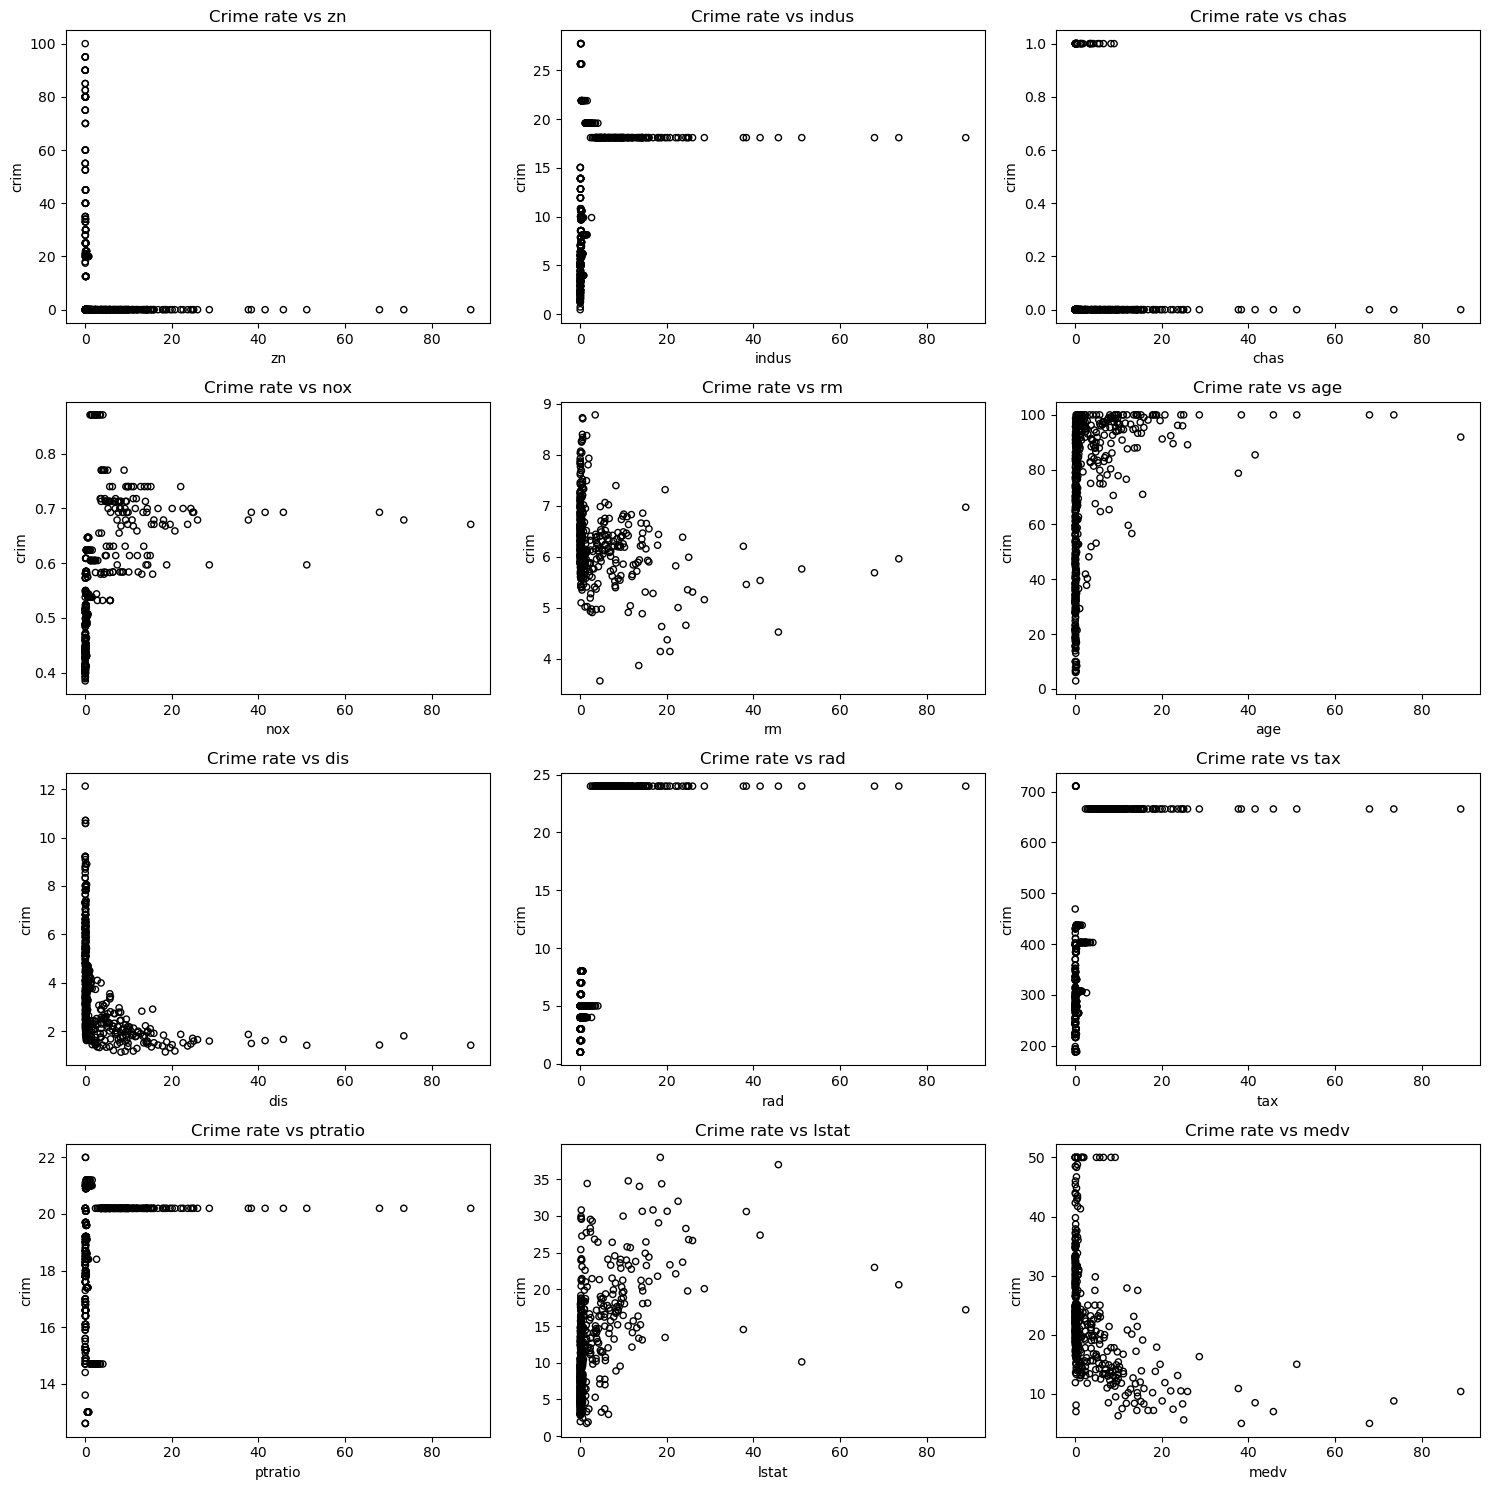

In [65]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.ravel()
for i, predictor in enumerate(predictors):
    axes[i].scatter(housing["crim"], housing[predictor], color="black", s=20, facecolor="none")
    axes[i].set_ylabel("crim")
    axes[i].set_xlabel(predictor)
    axes[i].set_title(f"Crime rate vs {predictor}")

plt.tight_layout()
plt.show()

From looking at the scatterplots, it seems that there is an association between
crime rate and each of: `medv`, `lstat`, `age`, `dis` and `tax`, but it's hard to
tell how strong the relationship is just from these plots. Let's run the numbers:

In [67]:
print(housing.corr()["crim"].sort_values(ascending=False))

crim       1.000000
rad        0.625505
tax        0.582764
lstat      0.455621
nox        0.420972
indus      0.406583
age        0.352734
ptratio    0.289946
chas      -0.055892
zn        -0.200469
rm        -0.219247
dis       -0.379670
medv      -0.388305
Name: crim, dtype: float64


Finally, let's compute the $ p $-values and $ t $-statistics associated to the
degree-$ 1 $ term for each model:

In [68]:
for predictor, model in models.items():
    t_stat = model.tvalues.iloc[1]  # [1] because [0] is the intercept
    p_val = model.pvalues.iloc[1]
    print(f"predictor: {predictor}".ljust(16), end='\t')
    print(f"t-statistic: {t_stat:.4f}".ljust(20), end='\t')
    print(f"p-value: {p_val:.3f}\n")

predictor: zn   	t-statistic: -4.5938	p-value: 0.000

predictor: indus	t-statistic: 9.9908 	p-value: 0.000

predictor: chas 	t-statistic: -1.2567	p-value: 0.209

predictor: nox  	t-statistic: 10.4190	p-value: 0.000

predictor: rm   	t-statistic: -5.0448	p-value: 0.000

predictor: age  	t-statistic: 8.4628 	p-value: 0.000

predictor: dis  	t-statistic: -9.2135	p-value: 0.000

predictor: rad  	t-statistic: 17.9982	p-value: 0.000

predictor: tax  	t-statistic: 16.0994	p-value: 0.000

predictor: ptratio	t-statistic: 6.8014 	p-value: 0.000

predictor: lstat	t-statistic: 11.4907	p-value: 0.000

predictor: medv 	t-statistic: -9.4597	p-value: 0.000



From these $ p $-values alone we are led to conclude that the only null hypothesis $ H_0 :  \beta_1 = 0 $
which we cannot discard is that for the model having `chas` as predictor, but this may be happening due
to confounding.

__15 (b):__

In [73]:
y = housing["crim"]
X = housing[predictors]
X = sm.add_constant(X)
multi_model = sm.OLS(y, X).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           2.03e-56
Time:                        22:14:18   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can definitely reject the null hypothesis $ H_0 : \beta_j = 0 $ for the
degree-$ 1 $ terms associated to the following predictors: `dis`, `rad` and `medv`.
The $ p $-value associated to `zn` is also quite low $ 1.5\% $. The ones for
`lstat` and `ptratio` are moderately low.

__15 (c):__ We see that in the multiple regression model, the relationship
between `crim` and most of the predictors is not statistically significant, even
though all but one of the individual $ p $-values were essentially zero in the
single-variable regression models, due to collinearity or confounding between some of the predictors.

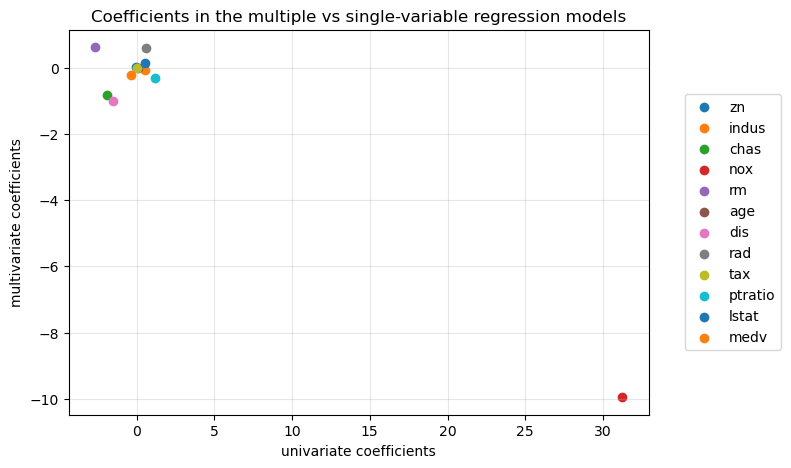

In [87]:
fig, ax = plt.subplots(figsize=(8, 5))
multi_coefs = multi_model.params[1:]
variables = list(predictors)
single_coefs = []
for predictor in predictors:
    single_coefs.append(models[predictor].params.iloc[1])

for i, (var, single, multi) in enumerate(zip(variables, single_coefs, multi_coefs)):
    plt.scatter(single, multi, label=var)
ax.set_xlabel("univariate coefficients")
ax.set_ylabel("multivariate coefficients")
ax.set_title("Coefficients in the multiple vs single-variable regression models")
ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', ncol=1)

# Adjust layout to prevent legend cutoff:
plt.subplots_adjust(right=0.85)
plt.grid(True, alpha=0.3)


__15 (d):__

In [100]:
poly_models = dict()
y = housing["crim"]
print("p-values for each model:\n")
for predictor in predictors:
    x = housing[predictor]
    X_poly = pd.DataFrame({
        'x' : x,
        'x2': x**2,
        'x3': x**3
    })
    X_poly = sm.add_constant(X_poly)

    model = sm.OLS(y, X_poly).fit()
    poly_models[predictor] = model 

    print(f"predictor: {predictor}")
    print(f"{model.pvalues.iloc[1:4].to_string()}\n")
    # print(f"p-value: {p_val:.3f}\n")

p-values for each model:

predictor: zn
x     0.002612
x2    0.093750
x3    0.229539

predictor: indus
x     5.297064e-05
x2    3.420187e-10
x3    1.196405e-12

predictor: chas
x     0.209435
x2    0.209435
x3    0.209435

predictor: nox
x     2.758372e-13
x2    6.811300e-15
x3    6.961110e-16

predictor: rm
x     0.211756
x2    0.364109
x3    0.508575

predictor: age
x     0.142661
x2    0.047377
x3    0.006680

predictor: dis
x     6.374792e-18
x2    4.941214e-12
x3    1.088832e-08

predictor: rad
x     0.623418
x2    0.613010
x3    0.482314

predictor: tax
x     0.109708
x2    0.137468
x3    0.243851

predictor: ptratio
x     0.003029
x2    0.004120
x3    0.006301

predictor: lstat
x     0.334530
x2    0.064587
x3    0.129891

predictor: medv
x     2.637707e-28
x2    3.260523e-18
x3    1.046510e-12



From the output we see that there is evidence of a non-linear relationship
between `crim` and some of the variables. For instance, the $ p $-value
associated to the cubic term in the model having `age` as a predictor is only $
0.6\% $, which is even lower than the $ p $-values associated to the linear ($
14.3\% $) and quadratic terms ($ 4.7\% $) in the same model.